<a href="https://colab.research.google.com/github/Victor6b/lab454/blob/main/Transfer%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd 'drive/My Drive/Intrusion-Detection-System-Using-CNN-and-Transfer-Learning'

/content/drive/My Drive/Intrusion-Detection-System-Using-CNN-and-Transfer-Learning


In [4]:
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Flatten,GlobalAveragePooling2D,Input,Conv2D,MaxPooling2D,Dropout
from keras.models import Model,load_model,Sequential
from keras.applications.xception import  Xception
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.resnet50 import  ResNet50
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.mobilenet import MobileNet
import keras.callbacks as kcallbacks
import keras
from keras.preprocessing.image import load_img,img_to_array
import math
import random
from keras.utils import plot_model
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np
from PIL import Image
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [ ]:
#generate training and test images
TARGET_SIZE=(224,224)
INPUT_SIZE=(224,224,3)
BATCHSIZE=128

#Normalization
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        './test_224/',
        target_size=TARGET_SIZE,
        batch_size=BATCHSIZE,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        './test_224/',
        target_size=TARGET_SIZE,
        batch_size=BATCHSIZE,
        class_mode='categorical')

Found 5420 images belonging to 5 classes.
Found 5420 images belonging to 5 classes.


In [ ]:
#plot the figures
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}
    def on_batch_end(self, iteration, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))
    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))
    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # acc
            #plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
            # loss
            plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
            # val_acc
            #plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            #plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()

In [ ]:
history_this= LossHistory()

# CNN


In [ ]:
def cnn_by_own(input_shape,num_class,epochs,savepath='./model_own.h5'):
    model = Sequential()
    model.add(Conv2D(64,(3,3),strides=(1,1),input_shape=input_shape,padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(Conv2D(64,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(num_class,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    #train model
    earlyStopping=kcallbacks.EarlyStopping(monitor='accuracy', patience=2, verbose=1, mode='auto')
    saveBestModel = kcallbacks.ModelCheckpoint(filepath=savepath, monitor='accuracy', verbose=1, save_best_only=True, mode='auto')
    hist=model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        callbacks=[saveBestModel,history_this],
    )

<ipython-input-13-1f8f190d8d44>:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist=model.fit_generator(


Epoch 1/10
 6/43 [===>..........................] - ETA: 44s - loss: 0.9464 - accuracy: 0.8086

43/43 [==============================] - ETA: 0s - loss: 0.3284 - accuracy: 0.9129
Epoch 1: accuracy improved from -inf to 0.91292, saving model to ./model_own.h5
43/43 [==============================] - 157s 2s/step - loss: 0.3284 - accuracy: 0.9129 - val_loss: 0.1054 - val_accuracy: 0.9321
Epoch 2/10
43/43 [==============================] - ETA: 0s - loss: 0.0412 - accuracy: 0.9832
Epoch 2: accuracy improved from 0.91292 to 0.98321, saving model to ./model_own.h5
43/43 [==============================] - 84s 2s/step - loss: 0.0412 - accuracy: 0.9832 - val_loss: 3.9983e-08 - val_accuracy: 1.0000
Epoch 3/10
43/43 [==============================] - ETA: 0s - loss: 0.0017 - accuracy: 0.9993
Epoch 3: accuracy improved from 0.98321 to 0.99926, saving model to ./model_own.h5
43/43 [==============================] - 84s 2s/step - loss: 0.0017 - accuracy: 0.9993 - val_loss: 1.3012e-04 - val_accuracy: 1.0000
Epoch 4/10
43/43 [==============================] - ETA: 0s - loss: 8.5612e-04 - accura

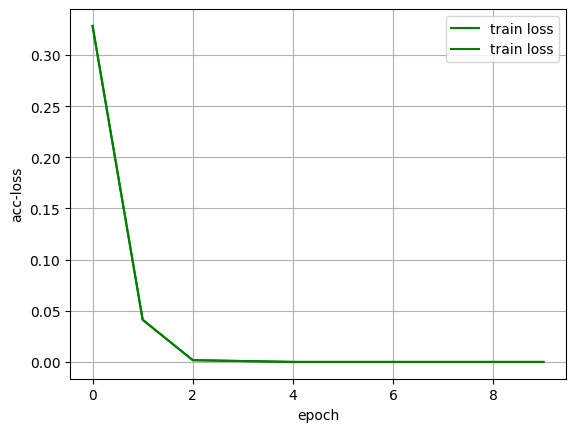

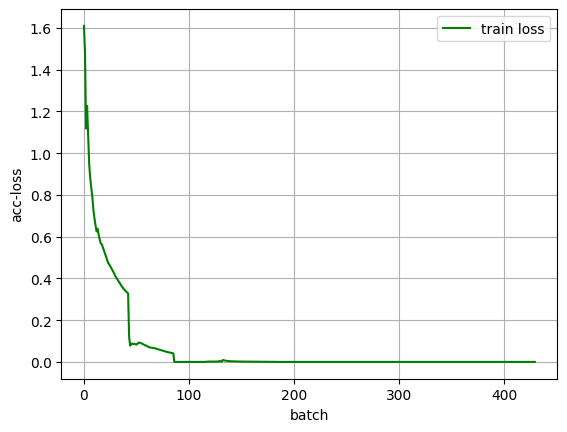

In [ ]:
cnn_by_own(input_shape=INPUT_SIZE,num_class=5,epochs=10)
history_this.loss_plot('epoch')
history_this.loss_plot('batch')
plt.show()

#EfficientNetB0


In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.callbacks as kcallbacks

def efficientnetB0(num_class, epochs, savepath='./efficientnetB0.h5', history=history_this, input_shape=(224, 224, 3)):
    # Load EfficientNetB0 model with pre-trained weights
    model_fine_tune = EfficientNetB0(input_shape=input_shape, include_top=False, weights='imagenet')

    # Freeze the layers up to a certain index
    # Note: You might want to adjust the number of layers to freeze based on the EfficientNetB0 structure
    for layer in model_fine_tune.layers[:100]:  # Example: freezing the first 100 layers
        layer.trainable = False
    for layer in model_fine_tune.layers[100:]:
        layer.trainable = True

    # Add custom layers on top of EfficientNetB0
    x = GlobalAveragePooling2D()(model_fine_tune.output)
    x = Dense(units=256, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_class, activation='softmax')(x)

    # Create the final model
    model = Model(inputs=model_fine_tune.input, outputs=predictions, name='efficientnetB0')

    # Compile the model
    model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    early_stopping = kcallbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto')
    save_best_model = kcallbacks.ModelCheckpoint(filepath=savepath, monitor='val_loss', save_best_only=True, verbose=1, mode='auto')

    # Assuming `train_generator` and `validation_generator` are defined
    hist = model.fit(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        callbacks=[early_stopping, save_best_model, history],
    )



Epoch 1/10
35/35 [==============================] - ETA: 0s - loss: 0.3529 - accuracy: 0.8750
Epoch 1: val_loss improved from inf to 3.72249, saving model to ./efficientnetB0.h5
35/35 [==============================] - 59s 1s/step - loss: 0.3529 - accuracy: 0.8750 - val_loss: 3.7225 - val_accuracy: 0.0959
Epoch 2/10
35/35 [==============================] - ETA: 0s - loss: 0.1567 - accuracy: 0.9513
Epoch 2: val_loss did not improve from 3.72249
35/35 [==============================] - 38s 1s/step - loss: 0.1567 - accuracy: 0.9513 - val_loss: 13.2072 - val_accuracy: 0.0959
Epoch 3/10
35/35 [==============================] - ETA: 0s - loss: 0.0601 - accuracy: 0.9837
Epoch 3: val_loss did not improve from 3.72249
35/35 [==============================] - 33s 933ms/step - loss: 0.0601 - accuracy: 0.9837 - val_loss: 19.5017 - val_accuracy: 0.0959
Epoch 4/10
35/35 [==============================] - ETA: 0s - loss: 0.0714 - accuracy: 0.9794
Epoch 4: val_loss did not improve from 3.72249
35/35 [

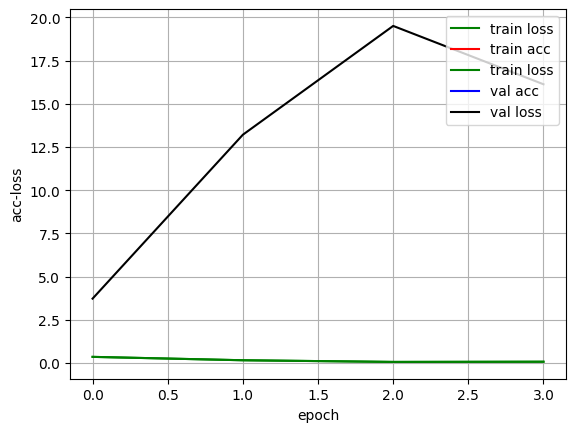

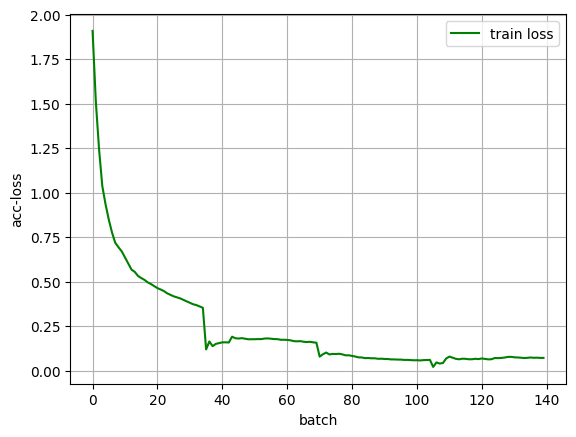

In [ ]:
efficientnetB0(num_class=6,epochs=10)	#tf36cnn
history_this.loss_plot('epoch')
history_this.loss_plot('batch')
plt.show()

#MobileNet

In [ ]:
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input

def mobilenet(num_class, epochs, savepath='./MobileNet.h5', history=history_this, input_shape=INPUT_SIZE):
    # Load MobileNet model with pre-trained weights
    model_fine_tune = MobileNet(input_shape=input_shape, include_top=False, weights='imagenet')

    # Freeze the layers up to a certain index
    for layer in model_fine_tune.layers[:60]:
        layer.trainable = False
    for layer in model_fine_tune.layers[60:]:
        layer.trainable = True


    # Add custom layers on top of MobileNet
    model = GlobalAveragePooling2D()(model_fine_tune.output)
    model = Dense(units=256, activation='relu')(model)
    model = Dropout(0.5)(model)
    model = Dense(num_class, activation='softmax')(model)


    # Create the final model
    model = Model(model_fine_tune.input, model, name='mobilenet')

    # Compile the model
    opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    # Train the model
    early_stopping = kcallbacks.EarlyStopping(monitor='accuracy', patience=1, verbose=1, mode='auto')
    save_best_model = kcallbacks.ModelCheckpoint(filepath=savepath, monitor='accuracy', verbose=1,
                                                 save_best_only=True, mode='auto')

    hist = model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        callbacks=[early_stopping, save_best_model, history],
    )


17225924/17225924 [==============================] - 2s 0us/step


<ipython-input-16-eaaf1400d003>:34: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/5
35/35 [==============================] - ETA: 0s - loss: 0.0700 - accuracy: 0.9767
Epoch 1: accuracy improved from -inf to 0.97668, saving model to ./MobileNet.h5
35/35 [==============================] - 48s 1s/step - loss: 0.0700 - accuracy: 0.9767 - val_loss: 0.1217 - val_accuracy: 0.9355
Epoch 2/5
35/35 [==============================] - ETA: 0s - loss: 9.0685e-05 - accuracy: 1.0000
Epoch 2: accuracy improved from 0.97668 to 1.00000, saving model to ./MobileNet.h5
35/35 [==============================] - 33s 932ms/step - loss: 9.0685e-05 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 3/5
35/35 [==============================] - ETA: 0s - loss: 1.2999e-04 - accuracy: 1.0000
Epoch 3: accuracy did not improve from 1.00000
35/35 [==============================] - 32s 926ms/step - loss: 1.2999e-04 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 0.9991
Epoch 3: early stopping


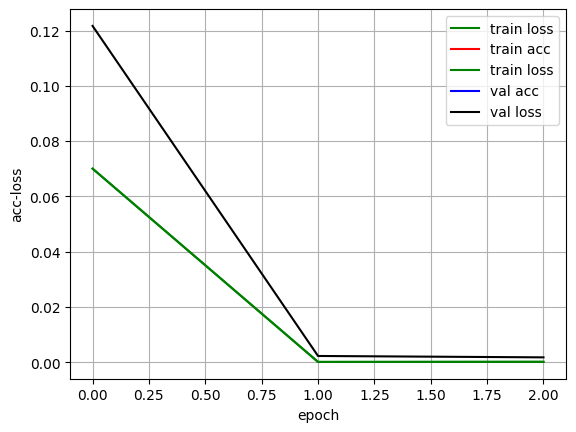

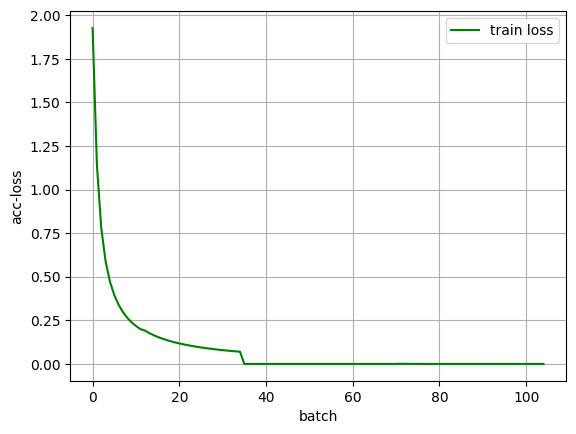

In [ ]:
mobilenet(num_class=6,epochs=5)	#tf36cnn
history_this.loss_plot('epoch')
history_this.loss_plot('batch')
plt.show()

#DenseNet121

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers

def densenet(num_class, epochs, savepath='./DenseNet121.h5', history=history_this, input_shape=INPUT_SIZE):
    # Load DenseNet121 model pretrained on ImageNet
    base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze the layers of the base model
    for layer in base_model.layers:
        layer.trainable = False

    # Build the top model
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(num_class, activation='softmax')(x)

    # Combine the base and top models
    model = Model(inputs=base_model.input, outputs=output)

    # Compile the model
    opt = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    # Train the model
    early_stopping = kcallbacks.EarlyStopping(
        monitor='accuracy', patience=1, verbose=1, mode='auto'
    )
    save_best_model = kcallbacks.ModelCheckpoint(
        filepath=savepath,
        monitor='accuracy',
        verbose=1,
        save_best_only=True,
        mode='auto'
    )

    hist = model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        callbacks=[early_stopping, save_best_model, history]
    )

29084464/29084464 [==============================] - 0s 0us/step


<ipython-input-9-242bb2a17088>:39: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


42/42 [==============================] - ETA: 0s - loss: 0.0156 - accuracy: 0.9943
Epoch 1: accuracy improved from -inf to 0.99431, saving model to ./DenseNet121.h5
42/42 [==============================] - 90s 2s/step - loss: 0.0156 - accuracy: 0.9943 - val_loss: 1.5427e-06 - val_accuracy: 1.0000


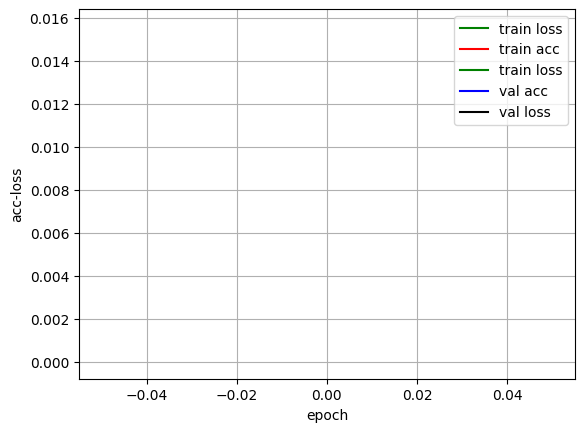

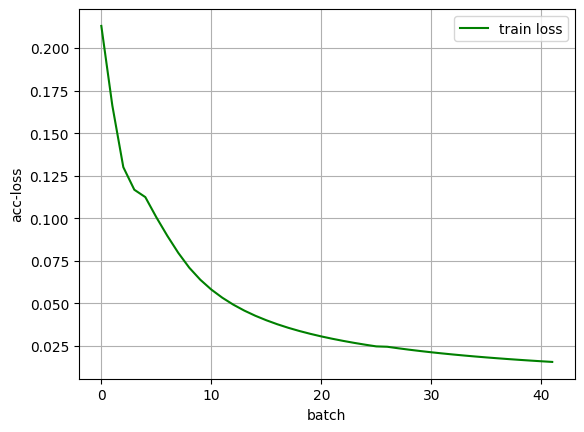

In [ ]:
densenet(num_class=2,epochs=1)	#tf36cnn
history_this.loss_plot('epoch')
history_this.loss_plot('batch')
plt.show()

# Vgg16

In [ ]:
def vgg16( num_class, epochs,savepath='./VGG16.h5',history=history_this,input_shape=INPUT_SIZE):
    model_fine_tune = VGG16(include_top=False, weights='imagenet', input_shape=input_shape)
    for layer in model_fine_tune.layers[:15]:	#the number of frozen layers for transfer learning, have tuned from 5-18
        layer.trainable = False
    for layer in model_fine_tune.layers[15:]:
        layer.trainable = True
    model = GlobalAveragePooling2D()(model_fine_tune.output) #GlobalAveragePooling2D layer to convert the features to a single 1280-element vector per image
    model=Dense(units=256,activation='relu')(model)
    model=Dropout(0.5)(model)
    model = Dense(num_class, activation='softmax')(model)
    model = Model(model_fine_tune.input, model, name='vgg')
    opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)	#tuned learning rate to be 0.001
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])	#set the loss function to be binary crossentropy
    #train model
    earlyStopping = kcallbacks.EarlyStopping(
        monitor='accuracy', patience=1, verbose=1, mode='auto')	#set early stop patience to save training time
    saveBestModel = kcallbacks.ModelCheckpoint(
        filepath=savepath,
        monitor='accuracy',
        verbose=1,
        save_best_only=True,
        mode='auto')
    hist = model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        #use_multiprocessing=True,
        #workers=2,
        callbacks=[earlyStopping, saveBestModel, history],
    )

<ipython-input-18-6a94455a1d64>:23: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/5
35/35 [==============================] - ETA: 0s - loss: 0.3121 - accuracy: 0.8940
Epoch 1: accuracy improved from -inf to 0.89405, saving model to ./VGG16.h5
35/35 [==============================] - 39s 1s/step - loss: 0.3121 - accuracy: 0.8940 - val_loss: 0.0492 - val_accuracy: 0.9875
Epoch 2/5
35/35 [==============================] - ETA: 0s - loss: 0.0342 - accuracy: 0.9948
Epoch 2: accuracy improved from 0.89405 to 0.99479, saving model to ./VGG16.h5
35/35 [==============================] - 37s 1s/step - loss: 0.0342 - accuracy: 0.9948 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 3/5
35/35 [==============================] - ETA: 0s - loss: 0.0030 - accuracy: 0.9991
Epoch 3: accuracy improved from 0.99479 to 0.99909, saving model to ./VGG16.h5
35/35 [==============================] - 37s 1s/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 2.3500e-09 - val_accuracy: 1.0000
Epoch 4/5
35/35 [==============================] - ETA: 0s - loss: 6.0301e-06 - accuracy: 1.0000

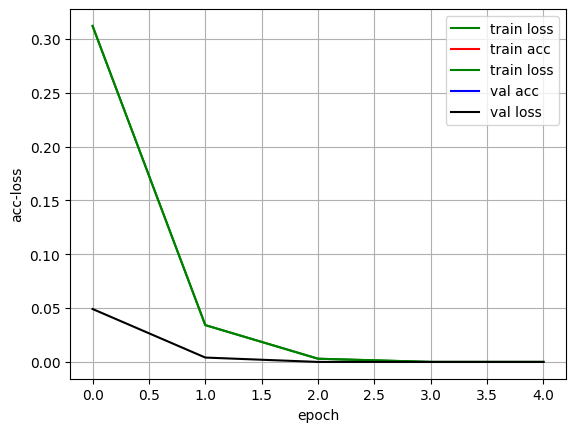

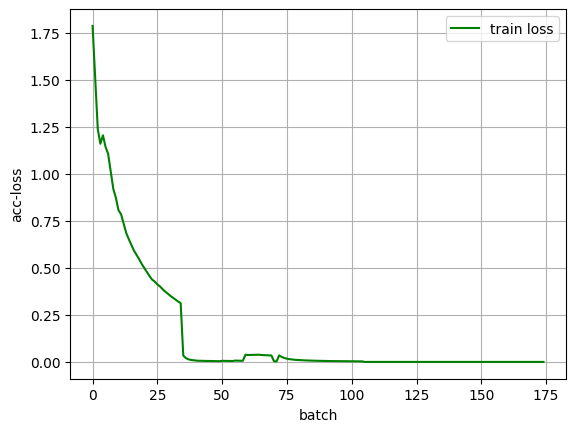

In [ ]:
vgg16(num_class=6,epochs=5)	#tf36cnn
history_this.loss_plot('epoch')
history_this.loss_plot('batch')
plt.show()

## Vgg19

In [ ]:
def vgg19( num_class, epochs,savepath='./VGG19.h5',history=history_this,input_shape=INPUT_SIZE):
    model_fine_tune = VGG19(include_top=False, weights='imagenet', input_shape=input_shape)
    for layer in model_fine_tune.layers[:19]:	#the number of frozen layers for transfer learning, have tuned from 5-18
        layer.trainable = False
    for layer in model_fine_tune.layers[19:]:
        layer.trainable = True
    model = GlobalAveragePooling2D()(model_fine_tune.output)
    model=Dense(units=256,activation='relu')(model)
    model=Dropout(0.5)(model)
    model = Dense(num_class, activation='softmax')(model)
    model = Model(model_fine_tune.input, model, name='vgg')
    opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)	#tuned learning rate to be 0.001
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])	#set the loss function to be binary crossentropy
    #train model
    earlyStopping = kcallbacks.EarlyStopping(
        monitor='accuracy', patience=1, verbose=1, mode='auto')	#set early stop patience to save training time
    saveBestModel = kcallbacks.ModelCheckpoint(
        filepath=savepath,
        monitor='accuracy',
        verbose=1,
        save_best_only=True,
        mode='auto')
    hist = model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        #use_multiprocessing=True,
        #workers=2,
        callbacks=[earlyStopping, saveBestModel, history],
    )

80134624/80134624 [==============================] - 0s 0us/step


<ipython-input-14-ff463f20db07>:23: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/20
183/183 [==============================] - ETA: 0s - loss: 0.0244 - accuracy: 0.9917
Epoch 1: accuracy improved from -inf to 0.99170, saving model to ./VGG19.h5
183/183 [==============================] - 159s 848ms/step - loss: 0.0244 - accuracy: 0.9917 - val_loss: 5.0879e-11 - val_accuracy: 1.0000
Epoch 2/20
183/183 [==============================] - ETA: 0s - loss: 2.2272e-06 - accuracy: 1.0000
Epoch 2: accuracy improved from 0.99170 to 1.00000, saving model to ./VGG19.h5
183/183 [==============================] - 159s 865ms/step - loss: 2.2272e-06 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/20
183/183 [==============================] - ETA: 0s - loss: 4.4515e-07 - accuracy: 1.0000
Epoch 3: accuracy did not improve from 1.00000
183/183 [==============================] - 158s 861ms/step - loss: 4.4515e-07 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3: early stopping


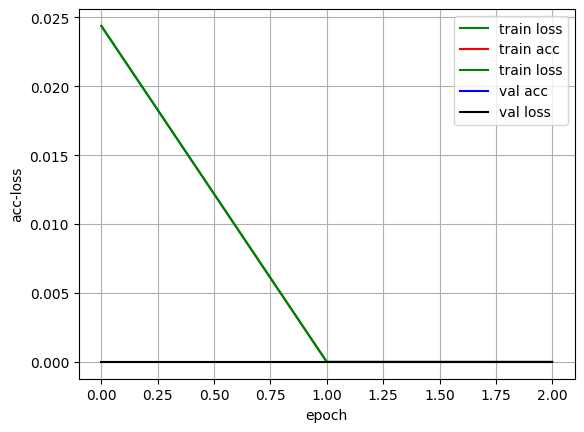

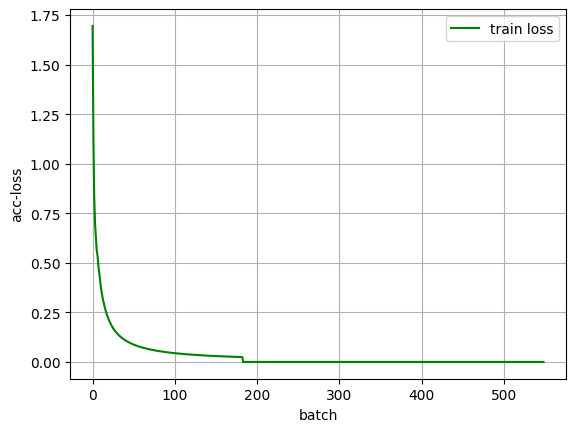

In [ ]:
vgg19(num_class=5,epochs=20)	#binary classificaiton
history_this.loss_plot('epoch')
history_this.loss_plot('batch')
plt.show()

# xception

In [ ]:
def xception( num_class, epochs,savepath='./xception.h5',history=history_this,input_shape=INPUT_SIZE):
    model_fine_tune = Xception(include_top=False, weights='imagenet', input_shape=input_shape)
    for layer in model_fine_tune.layers[:131]:		#could be tuned to be 50, 100, or 131
        layer.trainable = False
    for layer in model_fine_tune.layers[131:]:
        layer.trainable = True
    model = GlobalAveragePooling2D()(model_fine_tune.output)
    model=Dense(units=256,activation='relu')(model)
    model=Dropout(0.5)(model)
    model = Dense(num_class, activation='softmax')(model)
    model = Model(model_fine_tune.input, model, name='xception')
    opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    #train model
    earlyStopping = kcallbacks.EarlyStopping(
        monitor='accuracy', patience=1, verbose=1, mode='auto')	#patience could be tuned by 2 and 3
    saveBestModel = kcallbacks.ModelCheckpoint(
        filepath=savepath,
        monitor='accuracy',
        verbose=1,
        save_best_only=True,
        mode='auto')
    hist = model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        #use_multiprocessing=True,
        callbacks=[earlyStopping, saveBestModel, history],
    )

83683744/83683744 [==============================] - 2s 0us/step


<ipython-input-19-6b09352b25d0>:23: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/5
35/35 [==============================] - ETA: 0s - loss: 0.2394 - accuracy: 0.9368
Epoch 1: accuracy improved from -inf to 0.93683, saving model to ./xception.h5
35/35 [==============================] - 71s 2s/step - loss: 0.2394 - accuracy: 0.9368 - val_loss: 0.0454 - val_accuracy: 0.9624
Epoch 2/5
35/35 [==============================] - ETA: 0s - loss: 0.0185 - accuracy: 0.9971
Epoch 2: accuracy improved from 0.93683 to 0.99706, saving model to ./xception.h5
35/35 [==============================] - 37s 1s/step - loss: 0.0185 - accuracy: 0.9971 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 3/5
35/35 [==============================] - ETA: 0s - loss: 0.0052 - accuracy: 1.0000
Epoch 3: accuracy improved from 0.99706 to 1.00000, saving model to ./xception.h5
35/35 [==============================] - 40s 1s/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 4/5
35/35 [==============================] - ETA: 0s - loss: 0.0025 - accuracy: 1.000

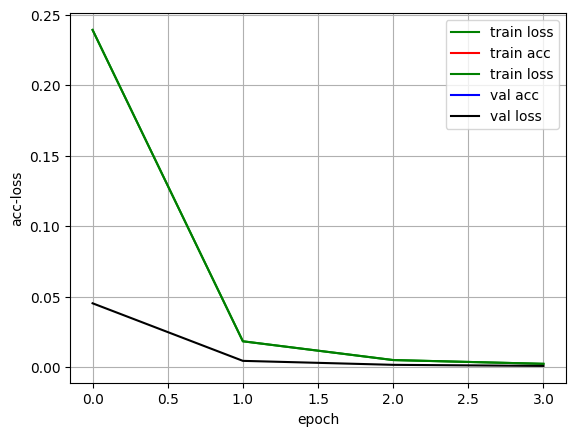

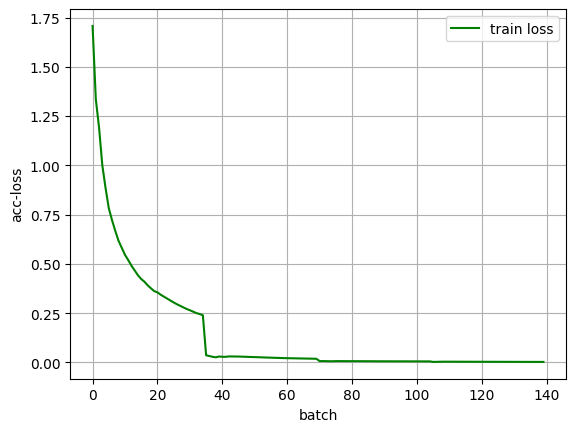

In [ ]:
#default only 50, tf36cnn 99
xception(num_class=6,epochs=5)
history_this.loss_plot('epoch')
history_this.loss_plot('batch')
plt.show()

# inception

In [ ]:
def inception( num_class, epochs,savepath='./inception.h5',history=history_this,input_shape=INPUT_SIZE):
    model_fine_tune = InceptionV3(include_top=False, weights='imagenet', input_shape=input_shape)
    for layer in model_fine_tune.layers[:35]:	#the number of frozen layers for transfer learning, have tuned from 50-150
        layer.trainable = False
    for layer in model_fine_tune.layers[35:]:	#the number of trainable layers for transfer learning
        layer.trainable = True
    model = GlobalAveragePooling2D()(model_fine_tune.output)
    model=Dense(units=256,activation='relu')(model)
    model=Dropout(0.5)(model)
    model = Dense(num_class, activation='softmax')(model)
    model = Model(model_fine_tune.input, model, name='resnet')
    opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)	#tuned learning rate to be 0.001
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy']) #set the loss function to be binary crossentropy
    #train model
    earlyStopping = kcallbacks.EarlyStopping(
        monitor='accuracy', patience=1, verbose=1, mode='auto')	#set early stop patience to save training time
    saveBestModel = kcallbacks.ModelCheckpoint(
        filepath=savepath,
        monitor='accuracy',
        verbose=1,
        save_best_only=True,
        mode='auto')
    hist = model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        #use_multiprocessing=True,
        callbacks=[earlyStopping, saveBestModel, history],
    )

<ipython-input-10-6ba5c459686e>:23: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/5
35/35 [==============================] - ETA: 0s - loss: 0.1228 - accuracy: 0.9563
Epoch 1: accuracy improved from -inf to 0.95631, saving model to ./inception.h5
35/35 [==============================] - 156s 3s/step - loss: 0.1228 - accuracy: 0.9563 - val_loss: 3.8609 - val_accuracy: 0.4480
Epoch 2/5
35/35 [==============================] - ETA: 0s - loss: 1.3936e-04 - accuracy: 1.0000
Epoch 2: accuracy improved from 0.95631 to 1.00000, saving model to ./inception.h5
35/35 [==============================] - 44s 1s/step - loss: 1.3936e-04 - accuracy: 1.0000 - val_loss: 1.8589 - val_accuracy: 0.6496
Epoch 3/5
35/35 [==============================] - ETA: 0s - loss: 5.4930e-05 - accuracy: 1.0000
Epoch 3: accuracy did not improve from 1.00000
35/35 [==============================] - 37s 1s/step - loss: 5.4930e-05 - accuracy: 1.0000 - val_loss: 1.6072 - val_accuracy: 0.7545
Epoch 3: early stopping


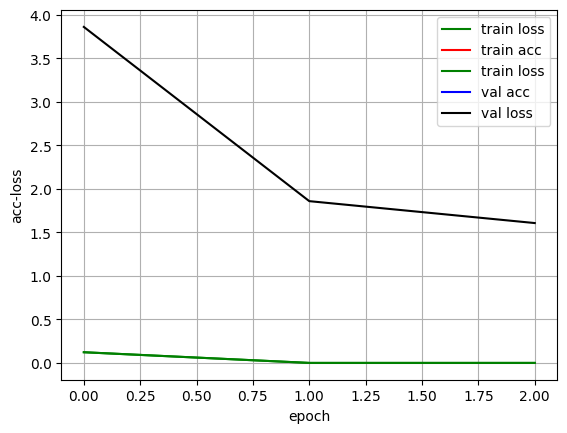

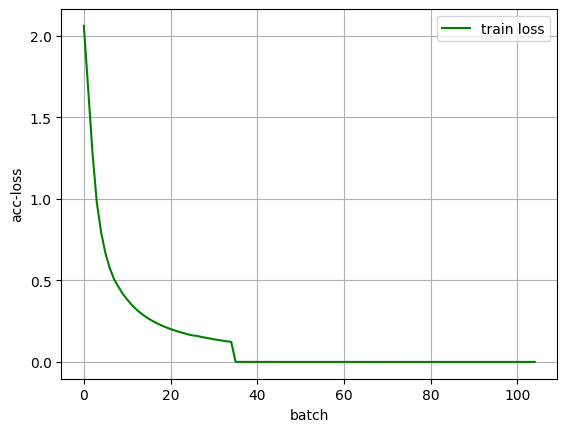

In [ ]:
inception(num_class=6,epochs=5)	#binary classificaiton
history_this.loss_plot('epoch')
history_this.loss_plot('batch')
plt.show()

# resnet

In [ ]:
def resnet( num_class, epochs,savepath='./resnet.h5',history=history_this,input_shape=INPUT_SIZE):
    model_fine_tune = ResNet50(include_top=False, weights='imagenet', input_shape=input_shape)
    for layer in model_fine_tune.layers[:120]:	#the number of frozen layers for transfer learning, have tuned from 50-150
        layer.trainable = False
    for layer in model_fine_tune.layers[120:]:	#the number of trainable layers for transfer learning
        layer.trainable = True
    model = GlobalAveragePooling2D()(model_fine_tune.output)
    model=Dense(units=256,activation='relu')(model)
    model=Dropout(0.5)(model)
    model = Dense(num_class, activation='softmax')(model)
    model = Model(model_fine_tune.input, model, name='resnet')
    opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)	#tuned learning rate to be 0.001
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy']) #set the loss function to be binary crossentropy
    #train model
    earlyStopping = kcallbacks.EarlyStopping(
        monitor='accuracy', patience=1, verbose=1, mode='auto')	#set early stop patience to save training time
    saveBestModel = kcallbacks.ModelCheckpoint(
        filepath=savepath,
        monitor='accuracy',
        verbose=1,
        save_best_only=True,
        mode='auto')
    hist = model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        #use_multiprocessing=True,
        callbacks=[earlyStopping, saveBestModel, history],
    )

In [ ]:
resnet(num_class=5,epochs=1)	#binary classificaiton
history_this.loss_plot('epoch')
history_this.loss_plot('batch')
plt.show()

ValueError: Argument(s) not recognized: {'lr': 0.001}

# inceptionresnet

In [ ]:
def inceptionresnet( num_class, epochs,savepath='./inceptionresnet.h5',history=history_this,input_shape=INPUT_SIZE):
    model_fine_tune = InceptionResNetV2(include_top=False, weights='imagenet', input_shape=input_shape)
    for layer in model_fine_tune.layers[:500]:	#the number of frozen layers for transfer learning, have tuned from 400-550
        layer.trainable = False
    for layer in model_fine_tune.layers[500:]:	#the number of trainable layers for transfer learning
        layer.trainable = True
    model = GlobalAveragePooling2D()(model_fine_tune.output)
    model=Dense(units=256,activation='relu')(model)
    model=Dropout(0.5)(model)
    model = Dense(num_class, activation='softmax')(model)
    model = Model(model_fine_tune.input, model, name='resnet')
    opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)	#tuned learning rate to be 0.001
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy']) #set the loss function to be binary crossentropy
    #train model
    earlyStopping = kcallbacks.EarlyStopping(
        monitor='accuracy', patience=2, verbose=1, mode='auto')	#set early stop patience to save training time
    saveBestModel = kcallbacks.ModelCheckpoint(
        filepath=savepath,
        monitor='accuracy',
        verbose=1,
        save_best_only=True,
        mode='auto')
    hist = model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        #use_multiprocessing=True,
        callbacks=[earlyStopping, saveBestModel, history],
    )

219055592/219055592 [==============================] - 11s 0us/step


<ipython-input-13-1b69d6443482>:23: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/10
35/35 [==============================] - ETA: 0s - loss: 0.1100 - accuracy: 0.9588
Epoch 1: accuracy improved from -inf to 0.95880, saving model to ./inceptionresnet.h5
35/35 [==============================] - 108s 2s/step - loss: 0.1100 - accuracy: 0.9588 - val_loss: 40.1977 - val_accuracy: 0.1165
Epoch 2/10
35/35 [==============================] - ETA: 0s - loss: 1.5079e-04 - accuracy: 1.0000
Epoch 2: accuracy improved from 0.95880 to 1.00000, saving model to ./inceptionresnet.h5
35/35 [==============================] - 53s 1s/step - loss: 1.5079e-04 - accuracy: 1.0000 - val_loss: 4.5265 - val_accuracy: 0.5565
Epoch 3/10
35/35 [==============================] - ETA: 0s - loss: 2.9859e-05 - accuracy: 1.0000
Epoch 3: accuracy did not improve from 1.00000
35/35 [==============================] - 43s 1s/step - loss: 2.9859e-05 - accuracy: 1.0000 - val_loss: 0.0776 - val_accuracy: 0.9919
Epoch 4/10
35/35 [==============================] - ETA: 0s - loss: 3.0038e-05 - accuracy: 

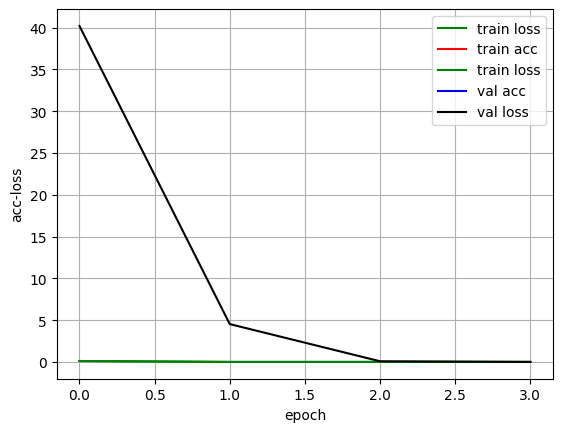

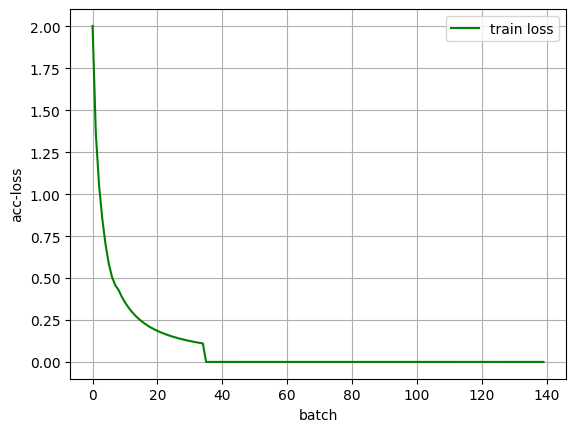

In [ ]:
inceptionresnet(num_class=6,epochs=10)	# 5-class classificaiton
history_this.loss_plot('epoch')
history_this.loss_plot('batch')
plt.show()